In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import os

2024-01-05 07:54:06.161992: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-05 07:54:06.196967: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 07:54:06.197012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 07:54:06.198001: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 07:54:06.203823: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-05 07:54:06.204273: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Specify the path to your uploaded zipfile
zipfile_path = 'animals.zip'  # Replace with the actual path

# Specify the destination folder for extraction
extracted_folder_path = 'animal_folder'  # Replace with the desired destination folder

# Create the destination folder if it doesn't exist
!mkdir -p $extracted_folder_path

# Use the unzip command to extract the contents
!unzip -o $zipfile_path -d $extracted_folder_path

# List the contents of the extracted folder
extracted_contents = os.listdir(extracted_folder_path)
print("Extraction successful.")
print("Contents of the extracted folder:", extracted_contents)

Archive:  animals.zip
   creating: animal_folder/animals/cats/
  inflating: animal_folder/animals/cats/cats_00001.jpg  
  inflating: animal_folder/animals/cats/cats_00002.jpg  
  inflating: animal_folder/animals/cats/cats_00003.jpg  
  inflating: animal_folder/animals/cats/cats_00004.jpg  
  inflating: animal_folder/animals/cats/cats_00005.jpg  
  inflating: animal_folder/animals/cats/cats_00006.jpg  
  inflating: animal_folder/animals/cats/cats_00007.jpg  
  inflating: animal_folder/animals/cats/cats_00008.jpg  
  inflating: animal_folder/animals/cats/cats_00009.jpg  
  inflating: animal_folder/animals/cats/cats_00010.jpg  
  inflating: animal_folder/animals/cats/cats_00011.jpg  
  inflating: animal_folder/animals/cats/cats_00012.jpg  
  inflating: animal_folder/animals/cats/cats_00013.jpg  
  inflating: animal_folder/animals/cats/cats_00014.jpg  
  inflating: animal_folder/animals/cats/cats_00015.jpg  
  inflating: animal_folder/animals/cats/cats_00016.jpg  
  inflating: animal_folde

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Specify the path to the data
data_folder = 'animal_folder'

# List all the image files in the 'animals' directory
image_files = []
for root, dirs, files in os.walk(os.path.join(data_folder, 'animals')):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(root, file))

# Create labels based on the subdirectories (cat, dog, panda)
labels = [os.path.basename(os.path.dirname(file)) for file in image_files]

# Load and preprocess the images
X_data = []
for file in image_files:
    img = load_img(file, target_size=(28, 28), color_mode='grayscale')  # Assuming you want images to be 28x28 and grayscale
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    X_data.append(img_array)

# Convert to NumPy array
X_data = np.array(X_data)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_data, labels, test_size=0.2, random_state=42, stratify=labels
)

# Print the number of samples in the training and test sets
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")
print(X_train.shape)
print(X_test.shape)


Number of training samples: 2400
Number of testing samples: 600
(2400, 28, 28, 1)
(600, 28, 28, 1)


In [5]:
label_mapping = {label: idx for idx, label in enumerate(set(y_train))}
y_train_indices = [label_mapping[label] for label in y_train]
y_test_indices = [label_mapping[label] for label in y_test]

# Convert the lists to NumPy arrays
y_train_indices = np.array(y_train_indices)
y_test_indices = np.array(y_test_indices)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout ,Activation,ZeroPadding2D
from tensorflow.keras.optimizers import Adam

model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(16,(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 6, 6, 128)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)         

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience=20,restore_best_weights=True, verbose=1)

In [21]:
learning_rate = 0.001

opt = Adam(learning_rate=learning_rate)
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fitting the model
history = model.fit(X_train, y_train_indices, epochs=50,validation_data=(X_test, y_test_indices),batch_size=64,callbacks=[es])

Epoch 1/50
38/38 [==============================] - 1s 17ms/step - loss: 0.0402 - accuracy: 0.9867 - val_loss: 1.6380 - val_accuracy: 0.7033
Epoch 2/50
38/38 [==============================] - 1s 14ms/step - loss: 0.0205 - accuracy: 0.9954 - val_loss: 1.6325 - val_accuracy: 0.7067
Epoch 3/50
38/38 [==============================] - 1s 13ms/step - loss: 0.0316 - accuracy: 0.9875 - val_loss: 1.6597 - val_accuracy: 0.6933
Epoch 4/50
38/38 [==============================] - 1s 13ms/step - loss: 0.0324 - accuracy: 0.9871 - val_loss: 1.5941 - val_accuracy: 0.6950
Epoch 5/50
38/38 [==============================] - 1s 14ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 1.7243 - val_accuracy: 0.6950
Epoch 6/50
38/38 [==============================] - 1s 14ms/step - loss: 0.0394 - accuracy: 0.9871 - val_loss: 1.5745 - val_accuracy: 0.6900
Epoch 7/50
38/38 [==============================] - 1s 14ms/step - loss: 0.0315 - accuracy: 0.9887 - val_loss: 1.6428 - val_accuracy: 0.6850
Epoch 8/50
38

In [22]:
y_test_indices = [label_mapping[label] for label in y_test]

# Convert the list to a NumPy array
y_test_indices = np.array(y_test_indices)

# Use the model to do prediction
scores = model.evaluate(X_train, y_train_indices)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))

scores = model.evaluate(X_test, y_test_indices)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

75/75 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000
Training Accuracy: 100.00%

19/19 [==============================] - 0s 4ms/step - loss: 1.4970 - accuracy: 0.6933
Testing Accuracy: 69.33%



In [23]:
test_predictions = model.predict(X_test)

19/19 [==============================] - 0s 4ms/step


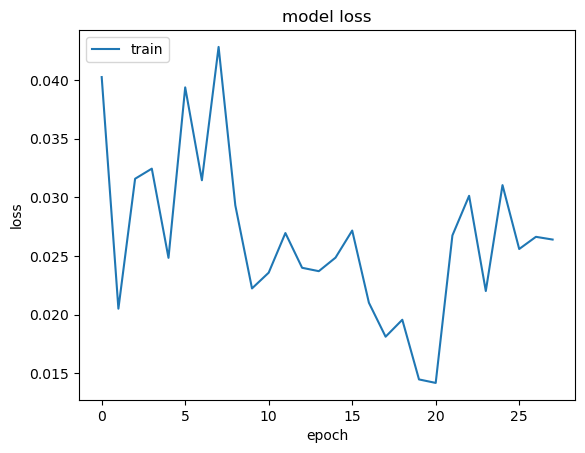

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()